In [56]:
import pandas as pd
import numpy as np
from collections import defaultdict 
import sys
import os
import matplotlib.pyplot as plt
from tabulate import tabulate

import keras 
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout, Embedding, LSTM, Flatten
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
import time

In [57]:
import multiprocessing
print(multiprocessing.cpu_count())

48


In [58]:
ADDR = '/nfs_home/nbhardwaj/data/rds_final/'
w_ADDR = '/nfs_home/nbhardwaj/results/'

In [55]:
files = [510
          , 511, 526, 600, 602, 620, 623, 625, 631, 641, 648, 657
         ]
sets = [
    x for x in range(64)
]


In [25]:
df_m = pd.DataFrame(columns = ['fname', 'set', 'train_acc', 'test_acc', 'len'])

for fname in files:
    begin = time.time()
    for cset in sets:
        df = pd.read_csv(ADDR+str(fname)+'_'+str(cset)+'.csv', index_col = [0], usecols = [0, 2, 7, 8])
        X = df[['delta']].values[1:]
        y = df[['label']].values[1:].reshape((-1,))
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
#         print(X_train[:5])
        clf = LogisticRegression(random_state = 42, n_jobs = -1, solver = 'sag')
        clf.fit(X_train, y_train)
        tr_ac =  clf.score(X_train, y_train)
        t_ac = clf.score(X_test, y_test)
        df_m.loc[len(df_m)] = [fname, cset, tr_ac, t_ac, len(df)]
    print("finished in ", time.time()-begin, "s")
    print("DONE FOR FILE", fname)
df_m.to_csv(w_ADDR+'softmax.csv')
print("-----------ITS DONEXX----------")


training acc-> 0.8657335617884206
testing acc-> 0.8653927533572836
finished in  35.78826689720154 s
training acc-> 0.8718858019241388
testing acc-> 0.8721133442916915
finished in  32.17026090621948 s
training acc-> 0.8723626327457293
testing acc-> 0.8723337729202961
finished in  35.05982995033264 s
training acc-> 0.8701657930741317
testing acc-> 0.8705058399880796
finished in  40.70396113395691 s
training acc-> 0.872891488011671
testing acc-> 0.8727354210351975
finished in  36.683682680130005 s
training acc-> 0.8699847390446017
testing acc-> 0.869768669449721
finished in  35.72953796386719 s
training acc-> 0.8708943545441299
testing acc-> 0.8708690456452656
finished in  39.88081336021423 s
training acc-> 0.8693694778149601
testing acc-> 0.8690974885147763
finished in  34.841552734375 s
training acc-> 0.8726427814099238
testing acc-> 0.8726979366629496
finished in  31.543829679489136 s
training acc-> 0.874089223923322
testing acc-> 0.8744168007795581
finished in  38.01331853866577 s
tra

In [102]:
a = pd.read_csv(w_ADDR+'softmax_delta.csv', index_col = [0])
res_delta = {}


for fname in files:
    df = a[a.fname == fname]
    res_delta[fname] = (np.dot(df.test_acc.values, df.len.values)/np.sum(df.len.values))
print(res_delta)

{641: 0.9208229965559767, 657: 0.869486635343629, 648: 0.9403762169269276, 620: 0.8004602329813997, 526: 0.8939430675175576, 623: 0.851924905947007, 625: 0.9613060856662582, 631: 0.8923488001101464, 600: 0.831804036819521, 602: 0.8671003857283904, 510: 0.866009520740431, 511: 0.8768722881634698}


In [103]:
a = pd.read_csv(w_ADDR+'softmax_instruction.csv', index_col = [0])
res_pc = {}


for fname in files:
    df = a[a.fname == fname]
    res_pc[fname] = (np.dot(df.test_acc.values, df.len.values)/np.sum(df.len.values))
print(res_pc)

{641: 0.9208009968571755, 657: 0.8694546014964966, 648: 0.9390067273789231, 620: 0.7987856685494138, 526: 0.8938290246113803, 623: 0.8513774844809814, 625: 0.9612349771496095, 631: 0.8931366349734211, 600: 0.8310379587775555, 602: 0.8671003857283904, 510: 0.8659700105246395, 511: 0.8766570944552697}


In [104]:
from collections import OrderedDict
res_pc = OrderedDict(sorted(res_pc.items()))
res_delta = OrderedDict(sorted(res_delta.items()))

In [105]:
for x in res_pc.keys():
    res_pc[x] = res_pc[x]*100
for x in res_delta.keys():
    res_delta[x] = res_delta[x]*100

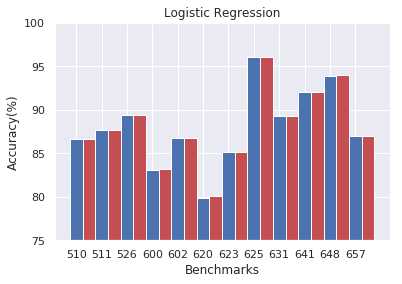

In [114]:
import seaborn as sns
sns.set()
plt.bar(range(len(res_pc)), list(res_pc.values()), align = 'center', color = 'b', width = 0.25)
plt.bar(np.asarray(range(len(res_pc)))+0.55, list(res_delta.values()), align = 'center', color = 'r', width = 0.25)

plt.xticks(range(len(res_pc)), list(res_pc.keys()))
plt.ylim((75, 100))
plt.xlabel('Benchmarks')
plt.ylabel('Accuracy(%)')
plt.title('Logistic Regression')
plt.show()

In [123]:
RES_ADDR = '/nfs_home/nbhardwaj/results/baseline_RD/'
w2_ADDR = '/nfs_home/nbhardwaj/model_weights/finalwts/'

In [ ]:
import seaborn as sns
from collections import OrderedDict

sns.set()
plt.bar(range(len(m)), list(m.values()), align = 'center', color = 'r')
plt.xticks(range(len(m)), list(m.keys()))
plt.ylim((80, 100))
plt.xlabel('Benchmarks')
plt.ylabel('Accuracy(%)')
plt.title('Embedding Classifier')
plt.show()



In [128]:
addr_l = [510  ,511 , 526,  600 , 602,  620,  631,  641, 648]

In [139]:
rm = [623, 625, 657]
for x in rm:
    if(x in res_delta.keys()):
        res_delta.pop(x)

In [140]:
res_delta

OrderedDict([(510, 86.60095207404311),
             (511, 87.68722881634699),
             (526, 89.39430675175576),
             (600, 83.1804036819521),
             (602, 86.71003857283904),
             (620, 80.04602329813997),
             (631, 89.23488001101464),
             (641, 92.08229965559767),
             (648, 94.03762169269277)])

In [127]:
bl = np.load(RES_ADDR+'addr_RD_baseline.npy', allow_pickle = True).item()
bl = OrderedDict((sorted(bl.items())))

In [144]:
rm = [623, 625, 657]
for x in rm:
    if(x in bl.keys()):
        bl.pop(x)

In [142]:
ec = {}
for addr in addr_l:
    df = pd.read_csv(w2_ADDR+str(addr)+'/results.csv')
    ec[addr] = 100*np.dot(df.test_acc.values, df.len.values)/np.sum(df.len.values)
ec = OrderedDict((sorted(ec.items())))

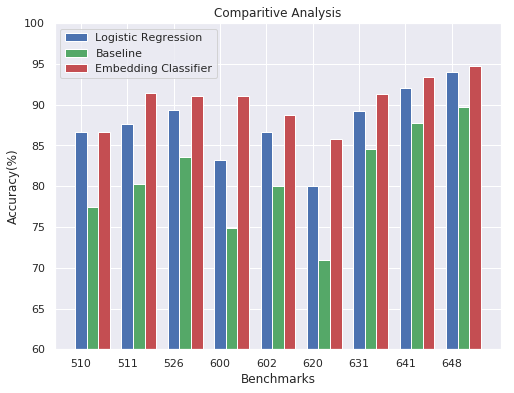

In [152]:
from matplotlib.pyplot import figure
figure(figsize = (8,6))

plt.bar(range(len(res_delta)), list(res_delta.values()), align = 'center', color = 'b', width = 0.25, label = 'Logistic Regression')
plt.bar(np.asarray(range(len(bl)))+0.25, list(bl.values()), align = 'center', color = 'g', width = 0.25, label = 'Baseline')
plt.bar(np.asarray(range(len(ec)))+0.5, list(ec.values()), align = 'center', color = 'r', width = 0.25, label = 'Embedding Classifier')
plt.xticks(range(len(ec)), list(ec.keys()))
plt.ylim((60, 100))
plt.xlabel('Benchmarks')
plt.ylabel('Accuracy(%)')
plt.title('Comparitive Analysis')
plt.legend()
plt.show()

In [130]:
bl

OrderedDict([(510, 77.47287102924612),
             (511, 80.25161316477254),
             (526, 83.63487204435636),
             (600, 74.83948946569507),
             (602, 79.96710842454911),
             (620, 70.89914954370671),
             (623, 78.53198288123359),
             (625, 94.22659326565504),
             (631, 84.59585927821486),
             (641, 87.77553567775553),
             (648, 89.71508122563274),
             (657, 80.41510709080387)])

In [131]:
res_delta

OrderedDict([(510, 86.60095207404311),
             (511, 87.68722881634699),
             (526, 89.39430675175576),
             (600, 83.1804036819521),
             (602, 86.71003857283904),
             (620, 80.04602329813997),
             (623, 85.1924905947007),
             (625, 96.13060856662582),
             (631, 89.23488001101464),
             (641, 92.08229965559767),
             (648, 94.03762169269277),
             (657, 86.94866353436291)])

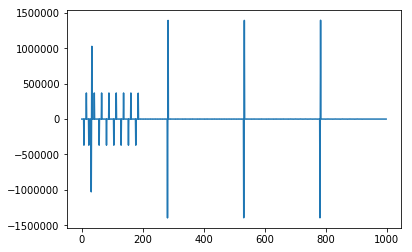

In [43]:
# a = df.delta.values[1:1000]
# plt.plot([x for x in range(len(a))], a)

In [51]:
# d[::-1]

array([5838805,   46882,   22011, ...,       1,       1,       1])

In [52]:
# perc = []
# tot = np.sum(d)
# s = 0
# for x in d[::-1]:
#     s+=x
#     perc.append(s/tot)

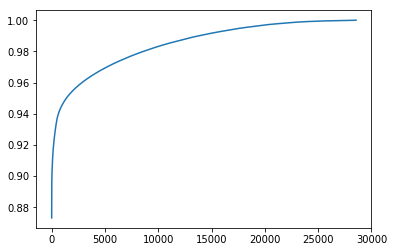

In [53]:
# plt.plot(perc)

In [28]:
# acc = np.dot(df_m['test_acc'], df_m['len'])

In [30]:
# print(acc/np.sum(df_m['len']))

0.8660099817220901


In [ ]:




# begin = time.time()
# X = df[['Instruction', 'delta', 'Mode']].values[1:]
# y = df[['label']].values[1:]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# print(X_train[:5])
# clf = LogisticRegression(random_state = 42, n_jobs = -1, solver = 'sag').fit(X_train, y_train)
# print("training acc->", clf.score(X_train, y_train))
# print("testing acc->", clf.score(X_test, y_test))
# print("finished in ", time.time()-begin, "s")
# print(clf.coef_)
# print(clf.intercept_)



# begin = time.time()
# X = df[['Instruction']].values[1:]
# y = df[['label']].values[1:].reshape((-1,))
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# print(X_train[:5])
# clf4 = LogisticRegression(random_state = 42, n_jobs = -1, solver = 'sag').fit(X_train, y_train)
# clf4.fit(X_train, y_train)
# print("training acc->", clf4.score(X_train, y_train))
# print("testing acc->", clf4.score(X_test, y_test))
# print("finished in ", time.time()-begin, "s")
# print(clf4.coef_)
# print(clf4.intercept_)

# begin = time.time()
# X = df[['delta']].values[1:]
# y = df[['label']].values[1:]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# clf5 = LogisticRegression(random_state = 42, n_jobs = -1, solver = 'sag')
# clf5.fit(X_train, y_train)
# print("training acc->", clf5.score(X_train, y_train))
# print("testing acc->", clf5.score(X_test, y_test))
# print("finished in ", time.time()-begin, "s")
# print(clf5.coef_)
# print(clf5.intercept_)

# begin = time.time()
# X = df[['Mode']].values[1:]
# y = df[['label']].values[1:]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# print(X_train[:5])
# clf6 = LogisticRegression(random_state = 42, n_jobs = -1, solver = 'sag')
# clf6.fit(X_train, y_train)
# print("training acc->", clf6.score(X_train, y_train))
# print("testing acc->", clf6.score(X_test, y_test))
# print("finished in ", time.time()-begin, "s")
# print(clf6.coef_)
# print(clf6.intercept_)

# begin = time.time()
# X = df[['Data']].values[1:]
# y = df[['label']].values[1:]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)
# # scaler = MinMaxScaler()
# # X_train = scaler.fit_transform(X_train)
# # X_test = scaler.transform(X_test)
# print(X_train[:5])
# clf7 = LogisticRegression(random_state = 42, n_jobs = -1, solver = 'sag')
# clf7.fit(X_train, y_train)
# print("training acc->", clf7.score(X_train, y_train))
# print("testing acc->", clf7.score(X_test, y_test))
# print("finished in ", time.time()-begin, "s")
# print(clf7.coef_)
# print(clf7.intercept_)













# #### Log transformations



# X = df[['Instruction', 'delta', 'Mode']].values[1:]
# # X[:, 1] = np.log(X[:, 1])
# y = df[['label']].values[1:]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# sign = np.where(X[:, 1]>0, 1, -1)
# X[:, 1] = np.multiply(np.log(np.abs(X[:, 1])), sign)

# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(random_state = 0).fit(X_train, y_train)

# clf.score(X_train, y_train)

# clf.score(X_test, y_test)

# No effect of Log transformations or random state change

